## Practical Machine Learning
### Assignment 1: Exploring and Visualizing Data

Description:
This assignment focuses on bringing data into Python, exploring and visualizing data. You will need to install Python on your personal computer (Mac or Windows) prior to working on this assignment. See Python installation instructions under Modules / Technology Resources / Software for Practical Machine Learning (Python version).

As part of this assignment, you are asked to choose a variable with meaningful magnitude and examine the effects of two transformations (scaling methods) on that variable.

Background Materials
The MSPA Software Survey was collected in December 2016. Data from the survey were used to inform data science curriculum planning. These data are provided in the comma-delimited text file <mspa-survey-data.csv>.

The survey was conducted online using Survey Monkey. A printed form of the survey items is provided in the file <mspa_software_survey.pdf>.

The survey data file, a jump-start Python program (mspa-software-case-jump-startv001.py), sample visualizations, and code for a heat map function, along with a directory of examples from the R software environment, are included in the zip archive:

mspa-software-survey-case-python-v005.zip

Variable Transformations and Scaling. To understand transformations or scaling methods, follow the Scikit Learn code provided here "https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py"

Some methods (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale.

It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.

Management Questions
Imagine that you are an academic administrator responsible for defining the future direction of the graduate program. The MSPA Survey has been designed with these objectives in mind:
- Learn about current student software preferences.
- Learn about student interest in potential new courses.
- Guide software and systems planning for current and future courses.
- Guide data science curriculum planning.
- Python Programming
- Add to the Python jump-start code example by computing descriptive statistics, exploring, and visualizing the survey data.

When completing this assignment, you are expected to use various Python packages, including NumPy, matplotlib, pandas, and seaborn.

Grading Guidelines (50 points)
------------------------------
- Data preparation, exploration, visualization (10 points)
- Review research design and modeling methods (10 points)
- Review results, evaluate models (10 points)
- Implementation and programming (10 points)
- Exposition, problem description, and management recommendations (10 points)

Deliverables and File Formats
Upload this python notebook once all the sections are complete.

Refer to Google’s Python Style Guide (Links to an external site.)Links to an external site. for ideas about formatting Python code. (https://google.github.io/styleguide/pyguide.html) Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.


In [1]:
# Jump-Start Example: Python analysis of MSPA Software Survey

# Update 2017-09-21 by Tom Miller and Kelsey O'Neill
# Update 2018-06-30 by Tom Miller v005 transformation code added

# tested under Python 3.6.1 :: Anaconda custom (x86_64)
# on Windows 10.0 and Mac OS Sierra 10.12.2 

# shows how to read in data from a comma-delimited text file
# manipuate data, create new count variables, define categorical variables,
# work with dictionaries and lambda mapping functions for recoding data 

# visualizations in this program are routed to external pdf files
# so they may be included in printed or electronic reports

# prepare for Python version 3x features and functions
# these two lines of code are needed for Python 2.7 only
# commented out for Python 3.x versions
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls

##### Setup Environment
- Ignore warnings
- Import necessary libraries
- Set default options, default styles 
- Setup parameters for plots

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)
###Loading Packages###
import pandas as pd  # data frame operations  
# set df options 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
plt.style.use('ggplot')
import seaborn as sns  # pretty plotting, including heat map
# output of plotting commands is displayed inline directly below the code cell that produced it
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline

## Data Preparation 
- Define functions for plotting/visualizations 
- Define functions to transform numerical vars to categorical
- Import data into environment
- Remove variables with NaN values
- Subset the data into diff groups for plotting

In [3]:
# define functions 
### correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')
    plt.show()
    plt.close()
np.set_printoptions(precision=3)
### overrides the default rcParams for plotting
def init_plotting():
    plt.style.use(style='ggplot')
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color']= 'black'
    plt.rcParams['ytick.color']= 'black'
init_plotting()
# avoid empty plot, always good to close plot
plt.close()

### Define function to calc the number of quarters left until
### graduation (pts surveyed in 2016)
def q_left(row):
    try:
        if "Fall 2016" in str(row['Graduate_Date']):
            return 0
        elif "Winter 2017" in row['Graduate_Date']:
            return 1
        elif "Spring 2017" in row['Graduate_Date']:
            return 2
        elif "Summer 2017" in row['Graduate_Date']:
            return 3
        elif "Fall 2017" in row['Graduate_Date']:
            return 4
        elif "Winter 2018" in row['Graduate_Date']:
            return 5
        elif "Spring 2018" in row['Graduate_Date']:
            return 6
        elif "Summer 2018" in row['Graduate_Date']:
            return 7
        elif "Fall 2018" in row['Graduate_Date']:
            return 8
        elif "Winter 2019" in row['Graduate_Date']:
            return 9
        elif "Spring 2019" in row['Graduate_Date']:
            return 10
        elif "Summer 2019" in row['Graduate_Date']:
            return 11
        elif "Fall 2019" in row['Graduate_Date']:
            return 12
        elif "2020 or Later" in row['Graduate_Date']:
            return 13
        else:
            return np.nan
    except TypeError:
        return np.nan

In [4]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv('mspa-survey-data.csv')
# Print the first 2 rows from the file
valid_survey_input.head(2)

,RespondentID,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,Industry_JavaScalaSpark,Industry_JavaScriptHTMLCSS,Industry_Python,Industry_R,Industry_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed,PREDICT400,PREDICT401,PREDICT410,PREDICT411,PREDICT413,PREDICT420,PREDICT422,PREDICT450,PREDICT451,PREDICT452,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
0,5135740122,0,0,0,50,50,0,0,0,25,75,0,0,0,50,50,50.0,90.0,51.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5133300037,10,10,50,30,0,25,25,30,20,0,20,25,40,15,0,20.0,50.0,90.0,50.0,6.0,PREDICT 400 Math for Modelers (Python),PREDICT 401 Introduction to Statistical Analys...,PREDICT 410 Regression and Multivariate Analys...,PREDICT 411 Generalized Linear Models (SAS),NaN,PREDICT 420 Database Systems and Data Preparat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018


## Data Exploration & Visualization

In [5]:
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)
### examine the structure of dataframe 
# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input), '\n') 
valid_survey_input.info()
valid_survey_input.dtypes


Number of Respondents = 207 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 5135740122 to 5109806898
Data columns (total 40 columns):
Personal_JavaScalaSpark             207 non-null int64
Personal_JavaScriptHTMLCSS          207 non-null int64
Personal_Python                     207 non-null int64
Personal_R                          207 non-null int64
Personal_SAS                        207 non-null int64
Professional_JavaScalaSpark         207 non-null int64
Professional_JavaScriptHTMLCSS      207 non-null int64
Professional_Python                 207 non-null int64
Professional_R                      207 non-null int64
Professional_SAS                    207 non-null int64
Industry_JavaScalaSpark             207 non-null int64
Industry_JavaScriptHTMLCSS          207 non-null int64
Industry_Python                     207 non-null int64
Industry_R                          207 non-null int64
Industry_SAS                        207 non-null int64
Python_Course_Interest 

Personal_JavaScalaSpark               int64
Personal_JavaScriptHTMLCSS            int64
Personal_Python                       int64
Personal_R                            int64
Personal_SAS                          int64
Professional_JavaScalaSpark           int64
Professional_JavaScriptHTMLCSS        int64
Professional_Python                   int64
Professional_R                        int64
Professional_SAS                      int64
Industry_JavaScalaSpark               int64
Industry_JavaScriptHTMLCSS            int64
Industry_Python                       int64
Industry_R                            int64
Industry_SAS                          int64
Python_Course_Interest              float64
Foundations_DE_Course_Interest      float64
Analytics_App_Course_Interest       float64
Systems_Analysis_Course_Interest    float64
Courses_Completed                   float64
PREDICT400                           object
PREDICT401                           object
PREDICT410                      

In [6]:
# remove variables with 30% or more NaN values.
df = valid_survey_input
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

# df['Graduate_Date'].value_counts()

# Apply quarters remaining function to df

df['Q_Left'] = df.apply(q_left, axis=1)


future = ['Winter 2019','Spring 2019','Summer 2019','Fall 2019', '2020 or Later']

df['Student_Type'] = np.where(df['Q_Left']>4,'More_Than_4Q_Left',
                              np.where(df['Q_Left']<=4,'Grad_Soon_within_4Q',df['Q_Left']))
# df[['Q_Left','Graduate_Date','Student_Type']].head()


List of dropped columns: PREDICT413, PREDICT422, PREDICT450, PREDICT451, PREDICT452, PREDICT453, PREDICT454, PREDICT455, PREDICT456, PREDICT457, OtherPython, OtherR, OtherSAS, Other, 



In [7]:
# shorten the variable/column names for software preference, course interest variables
survey_df = df.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Py',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Pro_Java',
    'Professional_JavaScriptHTMLCSS': 'Pro_JS',
    'Professional_Python': 'Pro_Py',
    'Professional_R': 'Pro_R',
    'Professional_SAS': 'Pro_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Py',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS',
    'Python_Course_Interest': 'py_int',
    'Foundations_DE_Course_Interest': 'de_int',
    'Analytics_App_Course_Interest': 'app_int',
    'Systems_Analysis_Course_Interest': 'sys_int',
    'Courses_Completed':'n_courses'})
survey_df.columns
survey_df.describe()
survey_df.describe(include=['object'])

Index(['My_Java', 'My_JS', 'My_Py', 'My_R', 'My_SAS', 'Pro_Java', 'Pro_JS', 'Pro_Py', 'Pro_R', 'Pro_SAS', 'Ind_Java', 'Ind_JS', 'Ind_Py', 'Ind_R', 'Ind_SAS', 'py_int', 'de_int', 'app_int', 'sys_int', 'n_courses', 'PREDICT400', 'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT420', 'Graduate_Date', 'Q_Left', 'Student_Type'], dtype='object')

,My_Java,My_JS,My_Py,My_R,My_SAS,Pro_Java,Pro_JS,Pro_Py,Pro_R,Pro_SAS,Ind_Java,Ind_JS,Ind_Py,Ind_R,Ind_SAS,py_int,de_int,app_int,sys_int,n_courses,Q_Left
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,206.000000,200.000000,203.000000,200.000000,187.000000,204.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058,73.529126,58.045000,55.201970,53.630000,6.342246,5.147059
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623,29.835429,32.588079,34.147954,33.539493,3.170849,3.358386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000,53.000000,29.500000,25.000000,21.500000,4.000000,2.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000,82.500000,60.000000,60.000000,51.500000,6.000000,5.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000,100.000000,89.250000,85.000000,80.250000,9.000000,8.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,12.000000,13.000000


,PREDICT400,PREDICT401,PREDICT410,PREDICT411,PREDICT420,Graduate_Date,Student_Type
count,163,171,145,113,127,204,207
unique,1,1,1,1,1,14,3
top,PREDICT 400 Math for Modelers (Python),PREDICT 401 Introduction to Statistical Analys...,PREDICT 410 Regression and Multivariate Analys...,PREDICT 411 Generalized Linear Models (SAS),PREDICT 420 Database Systems and Data Preparat...,Spring 2018,More_Than_4Q_Left
freq,163,171,145,113,127,30,119


In [8]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']
software_df.columns
len(software_df)
software_df.head(2)

# define subset DataFrame for analysis of new course interest 
course_int_df = survey_df.loc[:, 'py_int':'sys_int']
course_int_df.columns
len(course_int_df)
course_int_df.head(2)


# define subset DataFrame for future students - graduating 2019 or later

future = ['Winter 2019','Spring 2019','Summer 2019','Fall 2019', '2020 or Later']
future_survey_df = survey_df[survey_df.Graduate_Date.isin(future)  ]

# #change def 
# future_survey_df = survey_df[survey_df["Q_Left"]>=5]

future_survey_df.columns
len(future_survey_df)
future_survey_df.head(2)

# define subset DataFrame for analysis of software preferences - future students
future_software_df = future_survey_df.loc[:,'My_Java':'Ind_SAS']
future_software_df.columns
len(future_software_df)
future_software_df.head(2)

# define subset DataFrame for analysis of new course interest - future students 
future_course_int_df = future_survey_df.loc[:,'py_int':'sys_int']
future_course_int_df.columns
len(future_course_int_df)
future_course_int_df.head(2)

Index(['My_Java', 'My_JS', 'My_Py', 'My_R', 'My_SAS', 'Pro_Java', 'Pro_JS', 'Pro_Py', 'Pro_R', 'Pro_SAS', 'Ind_Java', 'Ind_JS', 'Ind_Py', 'Ind_R', 'Ind_SAS'], dtype='object')

207

,My_Java,My_JS,My_Py,My_R,My_SAS,Pro_Java,Pro_JS,Pro_Py,Pro_R,Pro_SAS,Ind_Java,Ind_JS,Ind_Py,Ind_R,Ind_SAS
RespondentID,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,0,0,0,50,50
5133300037,10,10,50,30,0,25,25,30,20,0,20,25,40,15,0


Index(['py_int', 'de_int', 'app_int', 'sys_int'], dtype='object')

207

,py_int,de_int,app_int,sys_int
RespondentID,,,,
5135740122,50.0,90.0,51.0,50.0
5133300037,20.0,50.0,90.0,50.0


Index(['My_Java', 'My_JS', 'My_Py', 'My_R', 'My_SAS', 'Pro_Java', 'Pro_JS', 'Pro_Py', 'Pro_R', 'Pro_SAS', 'Ind_Java', 'Ind_JS', 'Ind_Py', 'Ind_R', 'Ind_SAS', 'py_int', 'de_int', 'app_int', 'sys_int', 'n_courses', 'PREDICT400', 'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT420', 'Graduate_Date', 'Q_Left', 'Student_Type'], dtype='object')

33

,My_Java,My_JS,My_Py,My_R,My_SAS,Pro_Java,Pro_JS,Pro_Py,Pro_R,Pro_SAS,Ind_Java,Ind_JS,Ind_Py,Ind_R,Ind_SAS,py_int,de_int,app_int,sys_int,n_courses,PREDICT400,PREDICT401,PREDICT410,PREDICT411,PREDICT420,Graduate_Date,Q_Left,Student_Type
RespondentID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5131698528,20,0,40,30,10,70,0,25,5,0,40,10,30,20,0,100.0,100.0,100.0,100.0,11.0,NaN,PREDICT 401 Introduction to Statistical Analys...,PREDICT 410 Regression and Multivariate Analys...,PREDICT 411 Generalized Linear Models (SAS),PREDICT 420 Database Systems and Data Preparat...,Summer 2019,11.0,More_Than_4Q_Left
5129721525,0,0,50,50,0,0,0,50,50,0,0,0,50,50,0,100.0,50.0,100.0,100.0,6.0,PREDICT 400 Math for Modelers (Python),PREDICT 401 Introduction to Statistical Analys...,PREDICT 410 Regression and Multivariate Analys...,PREDICT 411 Generalized Linear Models (SAS),PREDICT 420 Database Systems and Data Preparat...,Winter 2019,9.0,More_Than_4Q_Left


Index(['My_Java', 'My_JS', 'My_Py', 'My_R', 'My_SAS', 'Pro_Java', 'Pro_JS', 'Pro_Py', 'Pro_R', 'Pro_SAS', 'Ind_Java', 'Ind_JS', 'Ind_Py', 'Ind_R', 'Ind_SAS'], dtype='object')

33

,My_Java,My_JS,My_Py,My_R,My_SAS,Pro_Java,Pro_JS,Pro_Py,Pro_R,Pro_SAS,Ind_Java,Ind_JS,Ind_Py,Ind_R,Ind_SAS
RespondentID,,,,,,,,,,,,,,,
5131698528,20,0,40,30,10,70,0,25,5,0,40,10,30,20,0
5129721525,0,0,50,50,0,0,0,50,50,0,0,0,50,50,0


Index(['py_int', 'de_int', 'app_int', 'sys_int'], dtype='object')

33

,py_int,de_int,app_int,sys_int
RespondentID,,,,
5131698528,100.0,100.0,100.0,100.0
5129721525,100.0,50.0,100.0,100.0


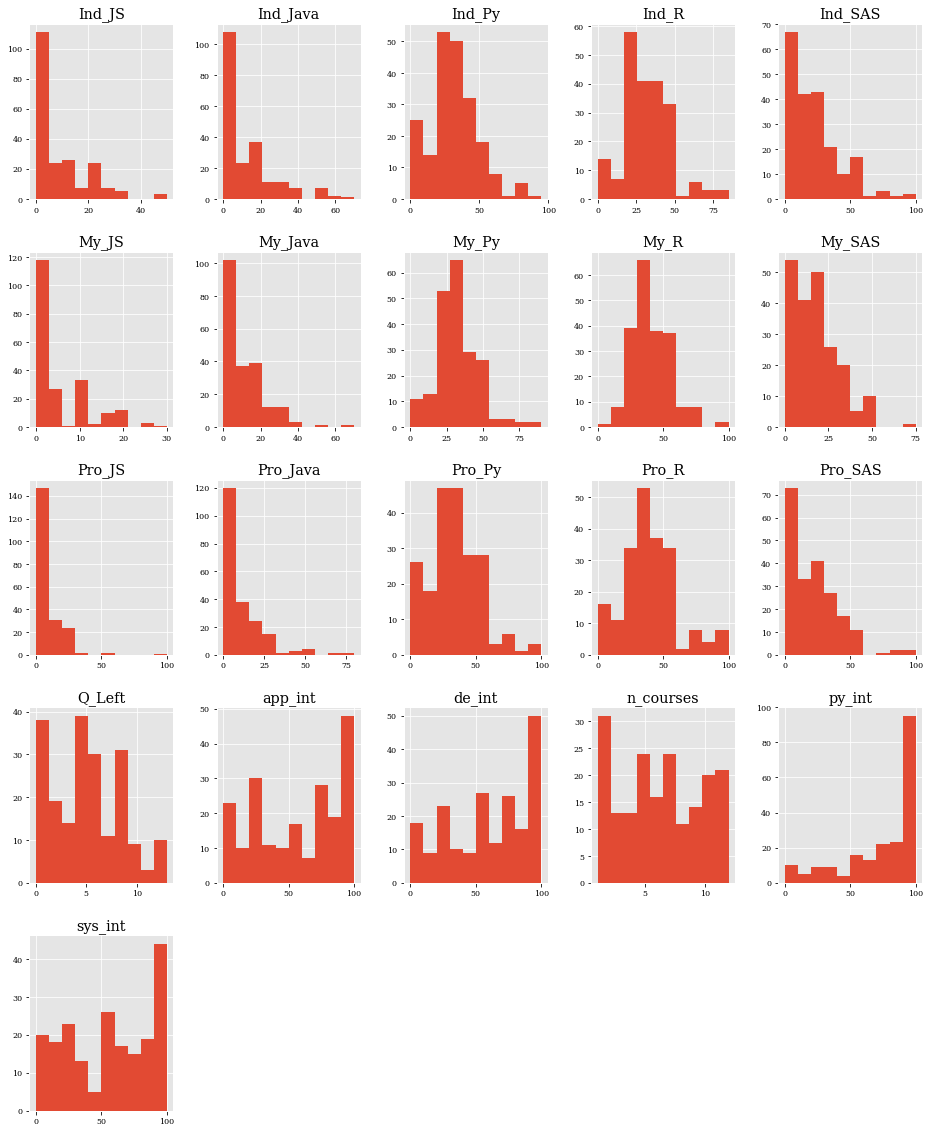

In [9]:
# Plot data distributions for numerical variables 
df_num = survey_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
df_num.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


------- Descriptive statistics for courses completed --------


count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: n_courses, dtype: float64


------- Descriptive statistics for software preferences --------


,My_Java,My_JS,My_Py,My_R,My_SAS,Pro_Java,Pro_JS,Pro_Py,Pro_R,Pro_SAS,Ind_Java,Ind_JS,Ind_Py,Ind_R,Ind_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000



------- Correlations - Python -------


My_Py        1.000000
Ind_Py       0.779632
Pro_Py       0.730511
py_int       0.323268
de_int       0.137317
app_int      0.082331
Pro_JS       0.020761
Q_Left       0.019193
sys_int     -0.008505
n_courses   -0.056593
Ind_Java    -0.081856
Ind_JS      -0.092460
Pro_Java    -0.152992
My_JS       -0.173517
My_Java     -0.197282
Ind_R       -0.255296
Pro_R       -0.283518
Pro_SAS     -0.333732
My_R        -0.374659
Ind_SAS     -0.408018
My_SAS      -0.491077
Name: My_Py, dtype: float64


------- Correlation Matrix - Software Prefs -------


<Figure size 720x576 with 0 Axes>

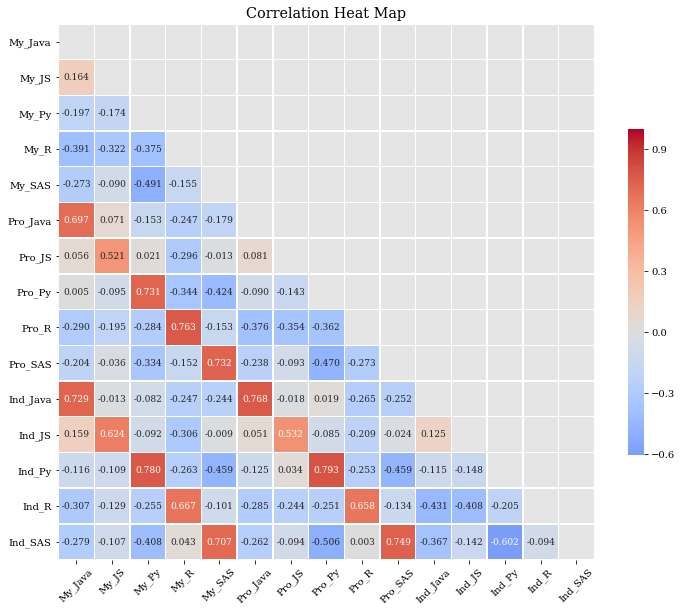

In [10]:
# descriptive statistics for one variable - courses completed
print('\n------- Descriptive statistics for courses completed --------')
survey_df['n_courses'].describe()

# descriptive statistics for software preference variables
print('\n------- Descriptive statistics for software preferences --------')
software_df.describe()

# examine intercorrelations among software preference variables
corr_matrix = survey_df.corr()
print('\n------- Correlations - Python -------')
corr_matrix["My_Py"].sort_values(ascending=False)
# with correlation matrix/heat map
print('\n------- Correlation Matrix - Software Prefs -------')
corr_chart(df_corr = software_df)

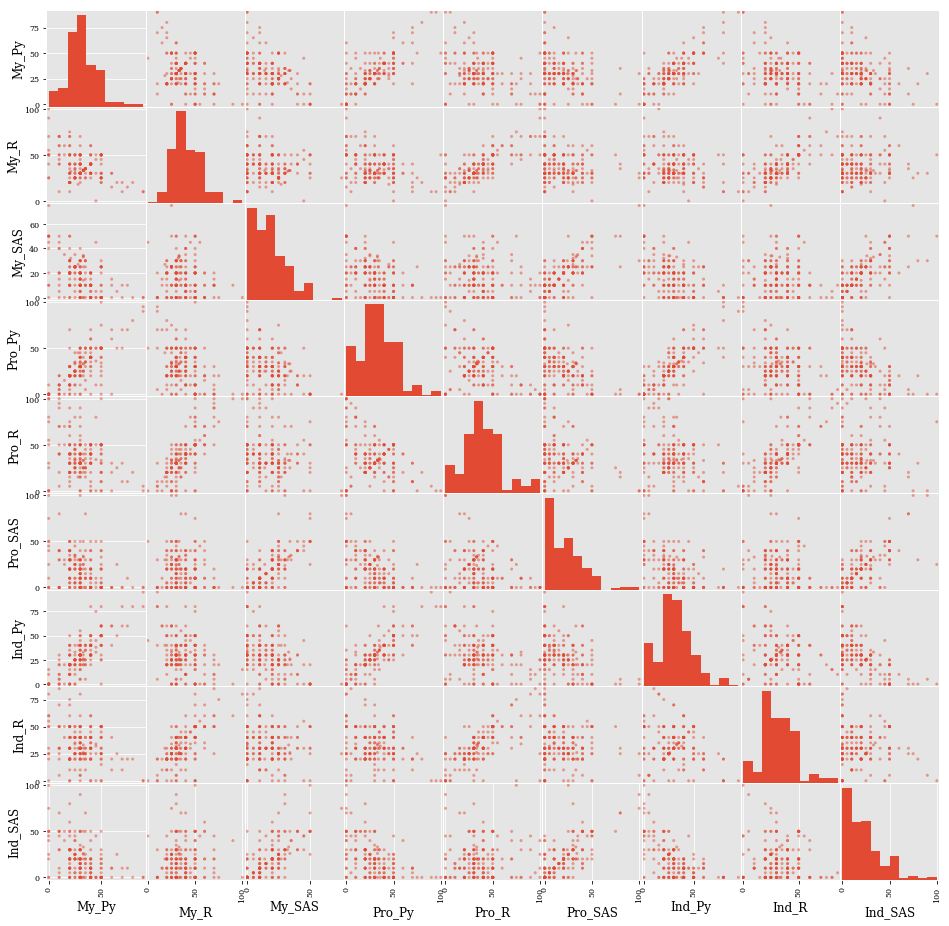

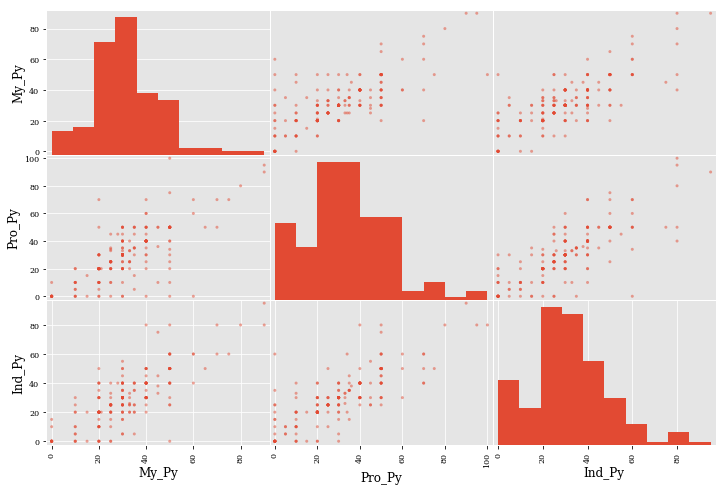

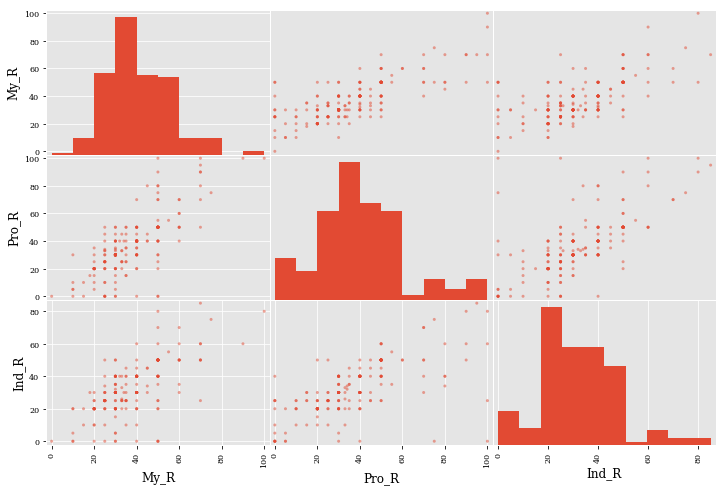

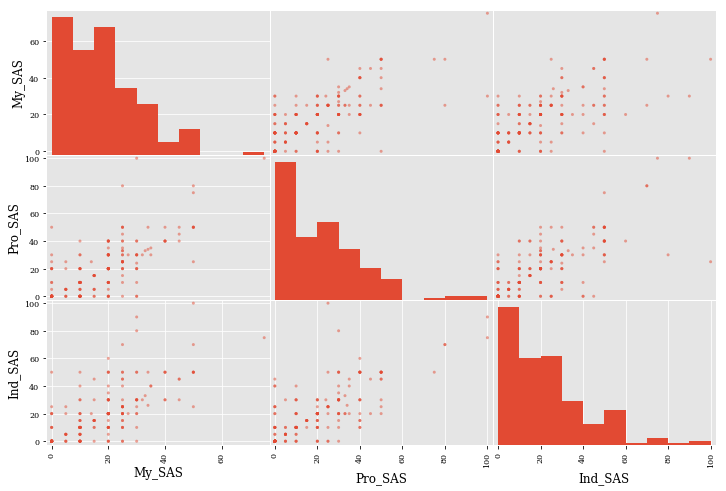

In [11]:
# # software_df.columns 
# Index(['My_Java', 'My_JS', 'My_Py', 'My_R', 'My_SAS', 'Pro_Java', 
#        'Pro_JS', 'Pro_Py', 'Pro_R', 'Pro_SAS', 'Ind_Java', 
#        'Ind_JS', 'Ind_Py', 'Ind_R', 'Ind_SAS'], dtype='object')

attributes = ['My_Py', 'My_R', 'My_SAS',
              'Pro_Py', 'Pro_R', 'Pro_SAS', 
              'Ind_Py', 'Ind_R', 'Ind_SAS']
scatter_matrix(software_df[attributes], figsize=(16, 16));
# save_fig("scatter_matrix_plot")

attributes = ['My_Py', 'Pro_Py', 'Ind_Py']
scatter_matrix(software_df[attributes], figsize=(12, 8));
# save_fig("scatter_matrix_plot")

attributes = ['My_R', 'Pro_R', 'Ind_R']
scatter_matrix(software_df[attributes], figsize=(12, 8));
# save_fig("scatter_matrix_plot")

attributes = ['My_SAS', 'Pro_SAS', 'Ind_SAS']
scatter_matrix(software_df[attributes], figsize=(12, 8));
# save_fig("scatter_matrix_plot")

Text(0.5,0,'Personal Preference for R')

Text(0,0.5,'Personal Preference for Python')

Text(0.5,1,'R and Python Perferences')

Text(0.5,0,'Personal Preference for Java/Scala/Spark')

Text(0,0.5,'Personal Preference for Java/Script/HTML/CSS')

Text(0.5,1,'My_Java and My_JS')

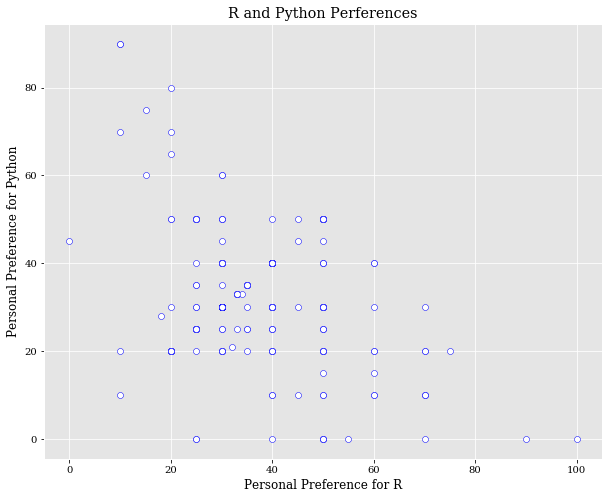

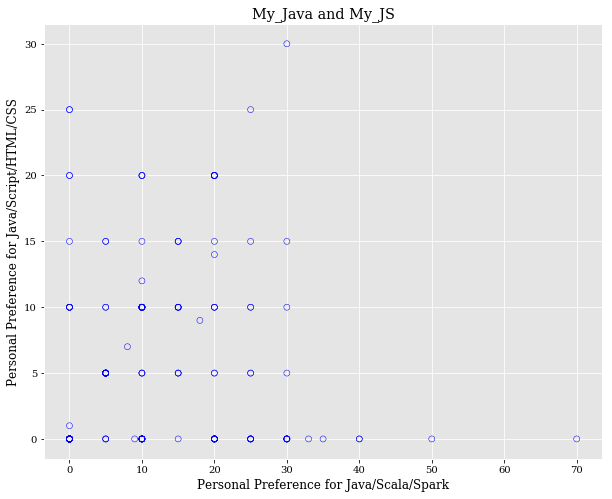

Text(0.5,0,'Personal Preference for Java/Scala/Spark')

Text(0,0.5,'Personal Preference for Python')

Text(0.5,1,'My_Java and My_Py')

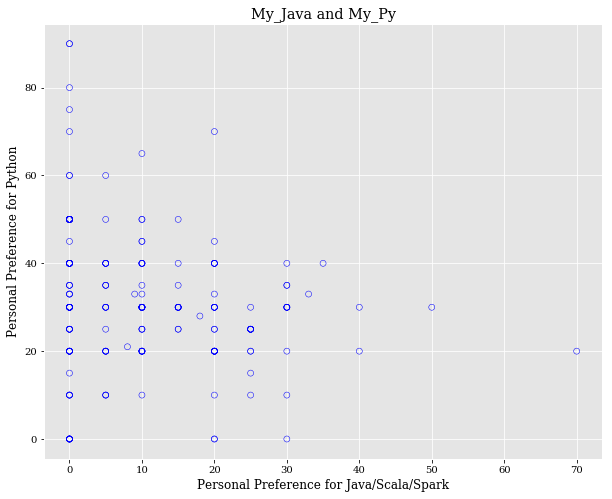

Text(0.5,0,'Personal Preference for Java/Scala/Spark')

Text(0,0.5,'Personal Preference for R')

Text(0.5,1,'My_Java and My_R')

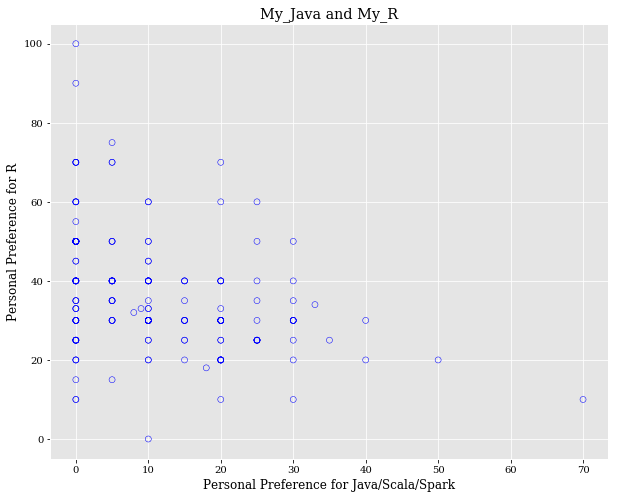

Text(0.5,0,'Personal Preference for Java/Scala/Spark')

Text(0,0.5,'Personal Preference for SAS')

Text(0.5,1,'My_Java and My_SAS')

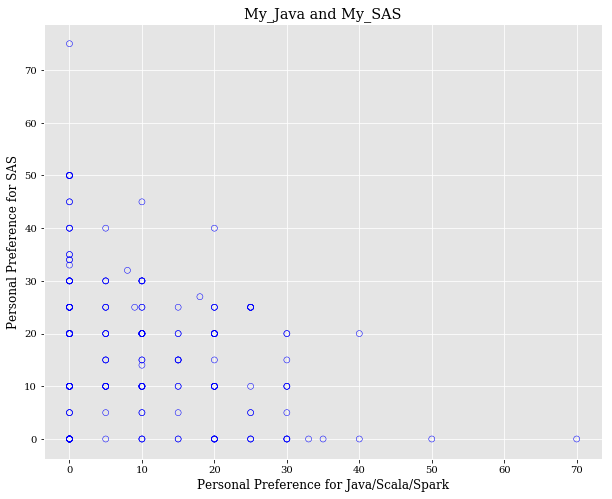

Text(0.5,0,'Personal Preference for Java/Script/HTML/CSS')

Text(0,0.5,'Personal Preference for Java/Scala/Spark')

Text(0.5,1,'My_JS and My_Java')

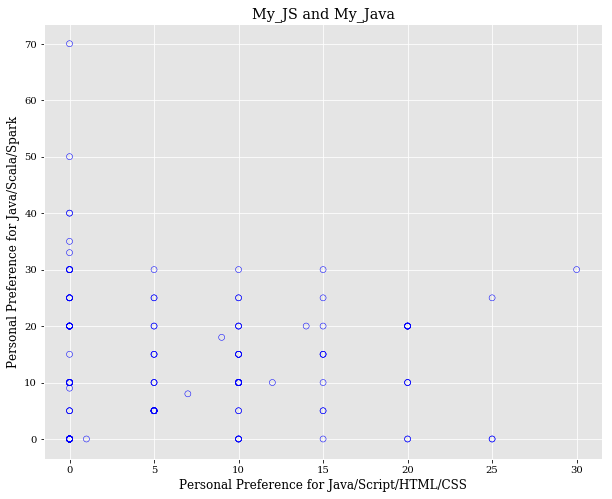

Text(0.5,0,'Personal Preference for Java/Script/HTML/CSS')

Text(0,0.5,'Personal Preference for Python')

Text(0.5,1,'My_JS and My_Py')

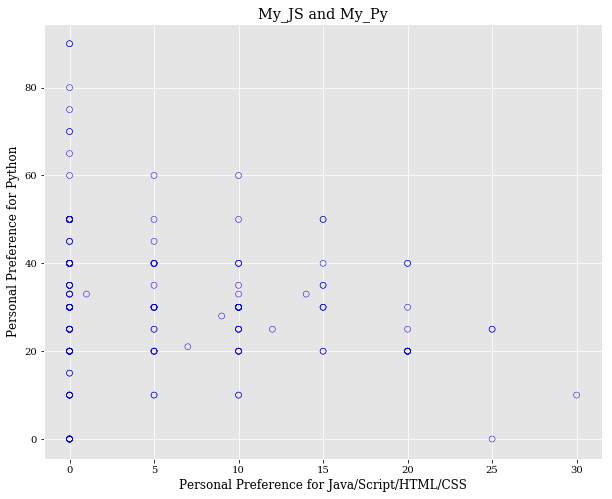

Text(0.5,0,'Personal Preference for Java/Script/HTML/CSS')

Text(0,0.5,'Personal Preference for R')

Text(0.5,1,'My_JS and My_R')

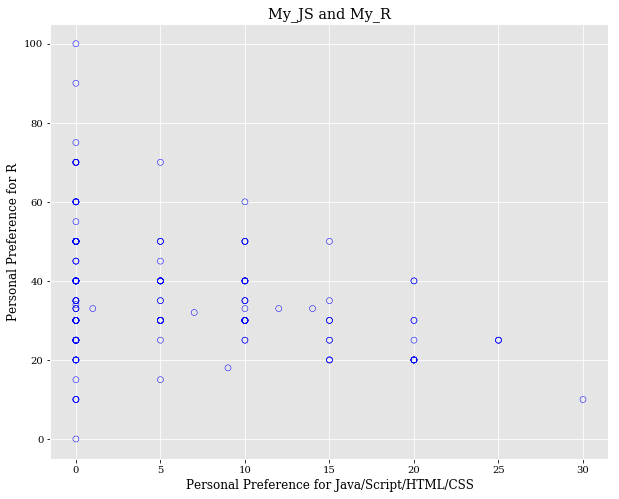

Text(0.5,0,'Personal Preference for Java/Script/HTML/CSS')

Text(0,0.5,'Personal Preference for SAS')

Text(0.5,1,'My_JS and My_SAS')

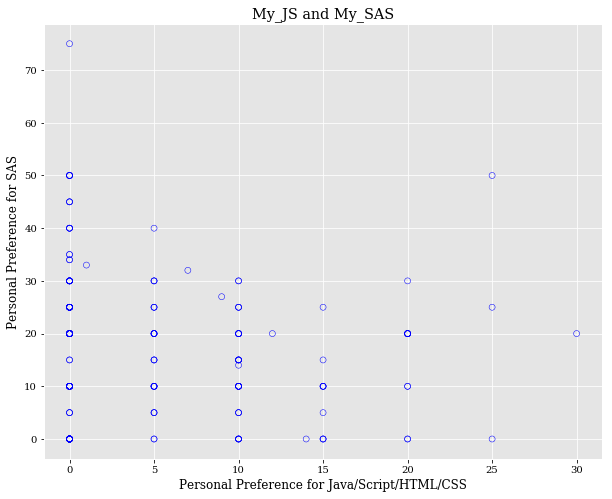

Text(0.5,0,'Personal Preference for Python')

Text(0,0.5,'Personal Preference for Java/Scala/Spark')

Text(0.5,1,'My_Py and My_Java')

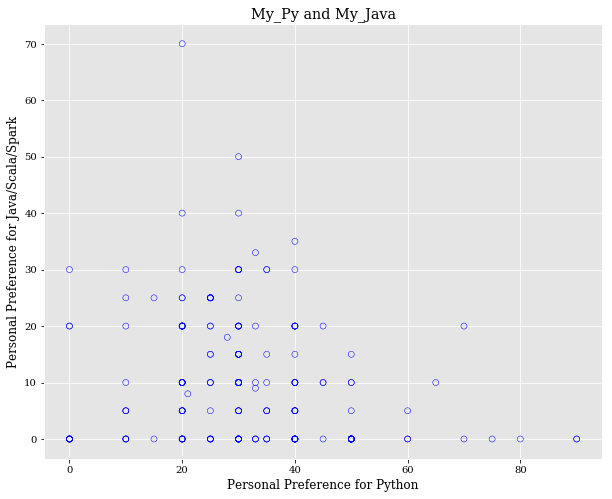

Text(0.5,0,'Personal Preference for Python')

Text(0,0.5,'Personal Preference for Java/Script/HTML/CSS')

Text(0.5,1,'My_Py and My_JS')

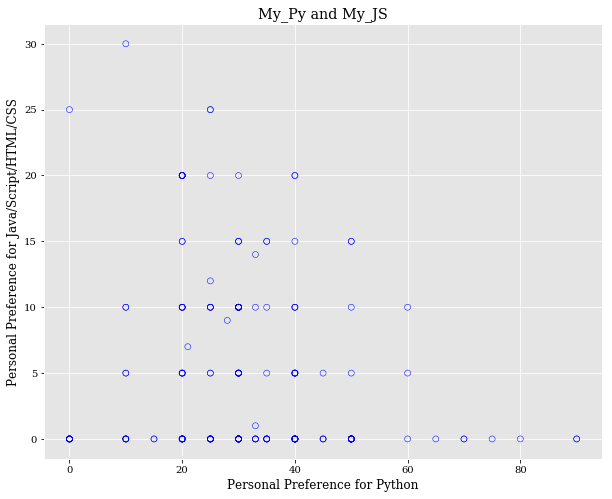

Text(0.5,0,'Personal Preference for Python')

Text(0,0.5,'Personal Preference for R')

Text(0.5,1,'My_Py and My_R')

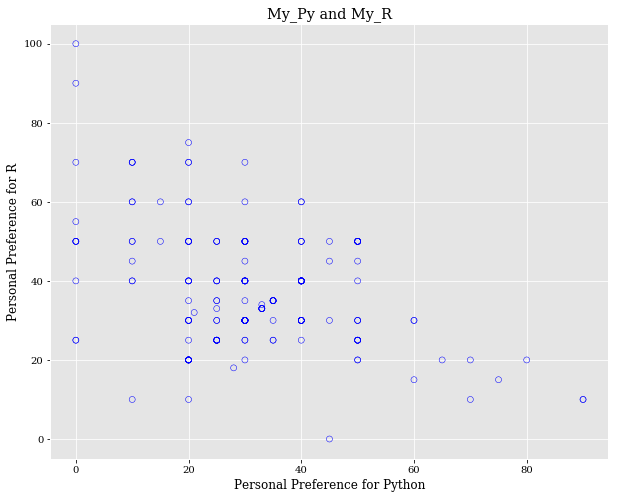

Text(0.5,0,'Personal Preference for Python')

Text(0,0.5,'Personal Preference for SAS')

Text(0.5,1,'My_Py and My_SAS')

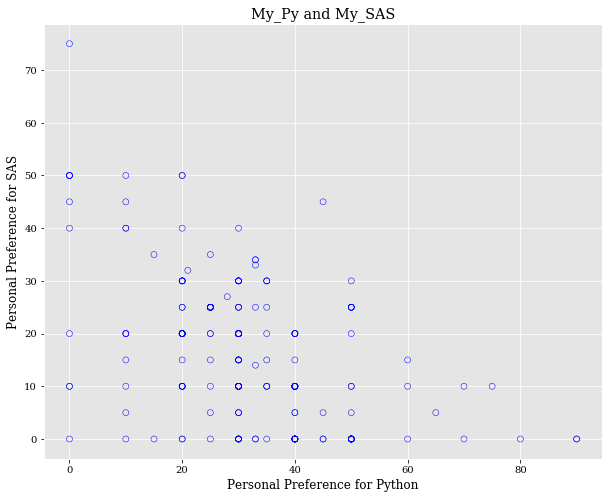

Text(0.5,0,'Personal Preference for R')

Text(0,0.5,'Personal Preference for Java/Scala/Spark')

Text(0.5,1,'My_R and My_Java')

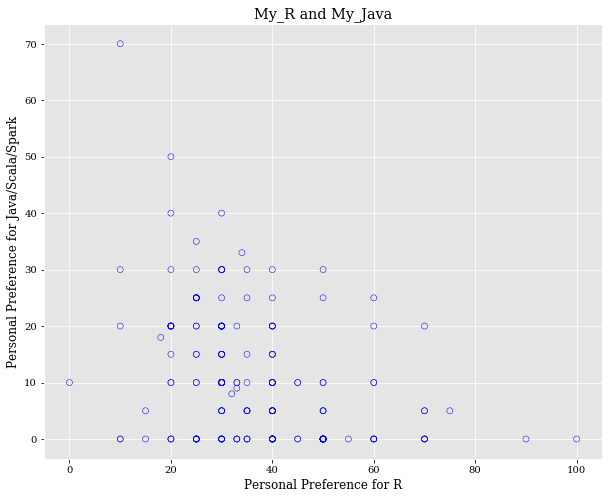

Text(0.5,0,'Personal Preference for R')

Text(0,0.5,'Personal Preference for Java/Script/HTML/CSS')

Text(0.5,1,'My_R and My_JS')

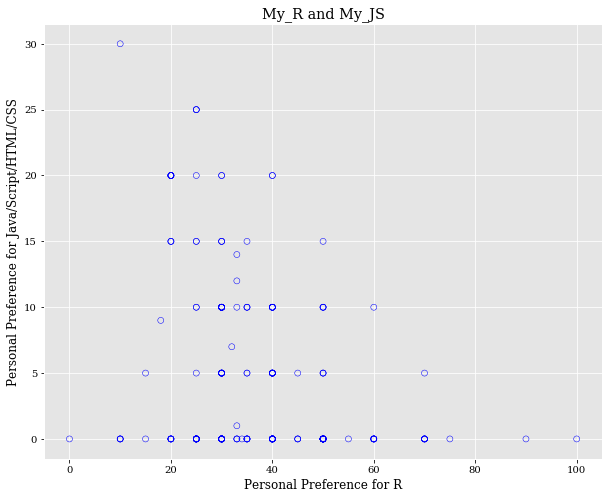

Text(0.5,0,'Personal Preference for R')

Text(0,0.5,'Personal Preference for Python')

Text(0.5,1,'My_R and My_Py')

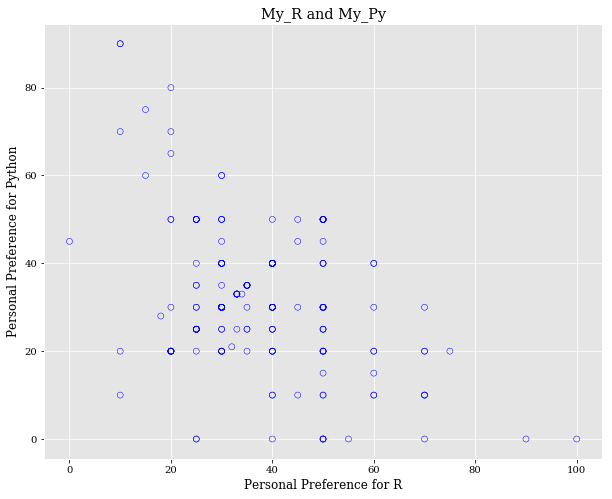

Text(0.5,0,'Personal Preference for R')

Text(0,0.5,'Personal Preference for SAS')

Text(0.5,1,'My_R and My_SAS')

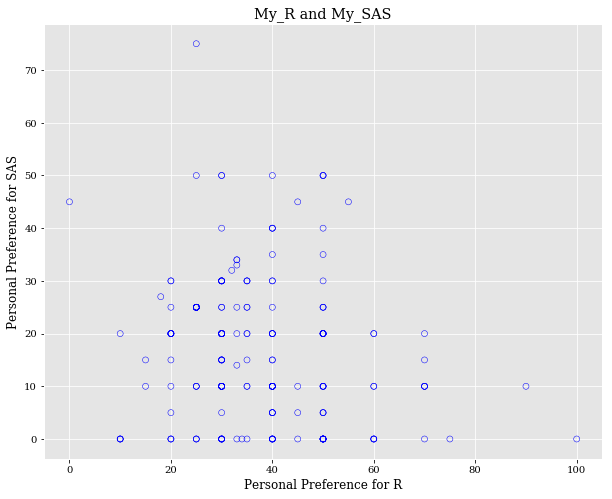

Text(0.5,0,'Personal Preference for SAS')

Text(0,0.5,'Personal Preference for Java/Scala/Spark')

Text(0.5,1,'My_SAS and My_Java')

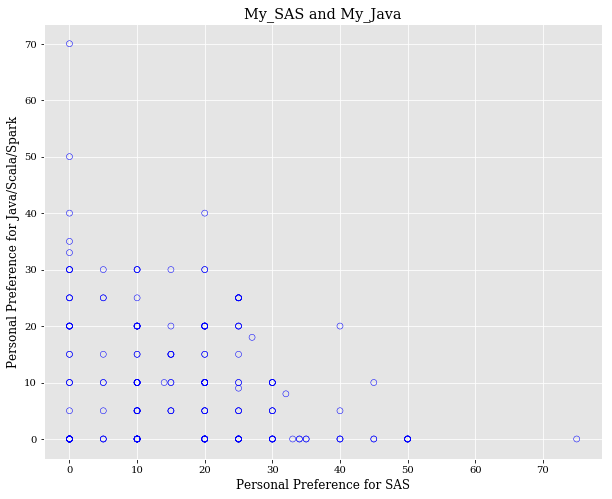

Text(0.5,0,'Personal Preference for SAS')

Text(0,0.5,'Personal Preference for Java/Script/HTML/CSS')

Text(0.5,1,'My_SAS and My_JS')

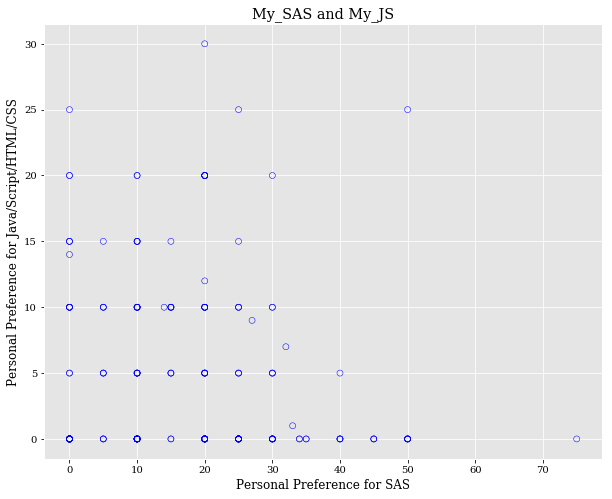

Text(0.5,0,'Personal Preference for SAS')

Text(0,0.5,'Personal Preference for Python')

Text(0.5,1,'My_SAS and My_Py')

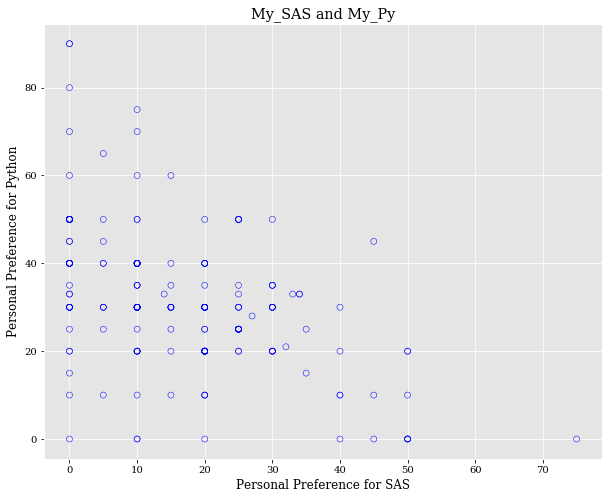

Text(0.5,0,'Personal Preference for SAS')

Text(0,0.5,'Personal Preference for R')

Text(0.5,1,'My_SAS and My_R')

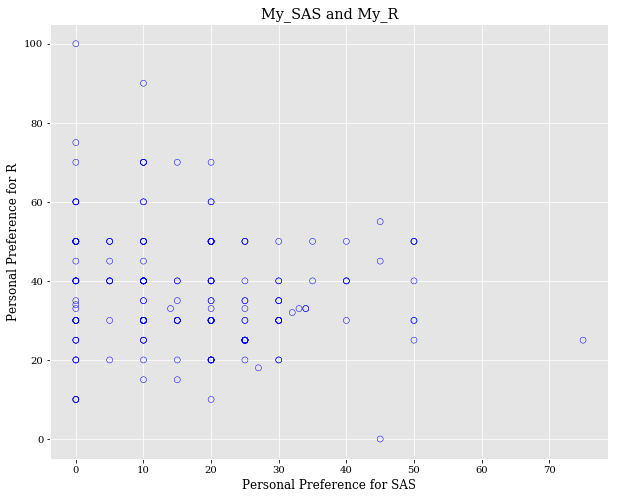

In [12]:
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Py'],
    facecolors = 'w', 
    edgecolors = 'blue')

# prep for multiple scatter plots 
survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
] 

# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.show()
            plt.close()


--------- Descriptive statistics for course interest - all students ------


,py_int,de_int,app_int,sys_int
count,206.000000,200.000000,203.000000,200.000000
mean,73.529126,58.045000,55.201970,53.630000
std,29.835429,32.588079,34.147954,33.539493
min,0.000000,0.000000,0.000000,0.000000
25%,53.000000,29.500000,25.000000,21.500000
50%,82.500000,60.000000,60.000000,51.500000
75%,100.000000,89.250000,85.000000,80.250000
max,100.000000,100.000000,100.000000,100.000000



--------- Median for course interest - all students ------


py_int     82.5
de_int     60.0
app_int    60.0
sys_int    51.5
dtype: float64

<Figure size 1080x360 with 0 Axes>

Text(0.5,1,'Boxplot of Course Interest - all students')

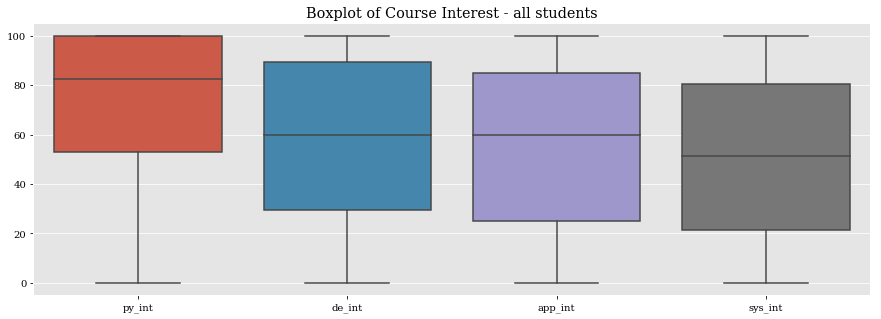


--------- course interest correlations - all students ------


<Figure size 720x576 with 0 Axes>

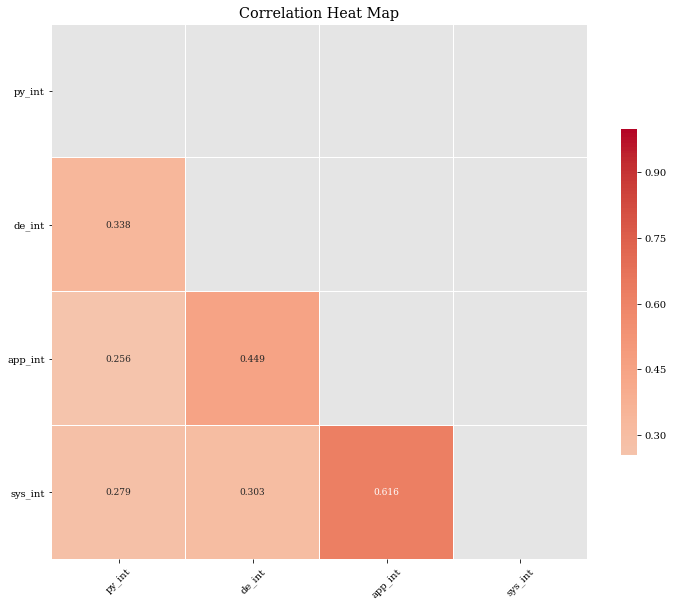

In [13]:
print('\n--------- Descriptive statistics for course interest - all students ------')
course_int_df.describe()
print('\n--------- Median for course interest - all students ------')
course_int_df.median()

#Box and whisker plot of course interest
plt.figure(figsize = (15,5))
sns.boxplot(data=course_int_df)
plt.title("Boxplot of Course Interest - all students")
plt.show()
plt.close()

print('\n--------- course interest correlations - all students ------')
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = course_int_df) 


------- Descriptive statistics for courses completed --------


count    31.000000
mean      3.870968
std       2.486523
min       1.000000
25%       2.000000
50%       3.000000
75%       4.500000
max      12.000000
Name: n_courses, dtype: float64


-------- Descriptive statistics for software preferences -------


,My_Java,My_JS,My_Py,My_R,My_SAS,Pro_Java,Pro_JS,Pro_Py,Pro_R,Pro_SAS,Ind_Java,Ind_JS,Ind_Py,Ind_R,Ind_SAS
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,12.060606,6.212121,32.606061,36.424242,12.696970,13.484848,5.545455,30.515152,36.727273,13.727273,14.787879,8.030303,29.030303,32.242424,15.909091
std,11.876814,8.841513,11.651018,12.976012,10.534126,18.012359,10.314101,16.409070,20.044127,14.917005,17.586852,11.854548,14.898584,15.811448,14.708339
min,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,25.000000,30.000000,0.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,20.000000,0.000000
50%,10.000000,0.000000,30.000000,33.000000,10.000000,5.000000,0.000000,30.000000,40.000000,10.000000,10.000000,5.000000,30.000000,30.000000,20.000000
75%,20.000000,10.000000,40.000000,50.000000,20.000000,20.000000,5.000000,40.000000,50.000000,20.000000,25.000000,10.000000,40.000000,50.000000,20.000000
max,35.000000,30.000000,50.000000,70.000000,40.000000,70.000000,50.000000,60.000000,100.000000,50.000000,70.000000,50.000000,60.000000,60.000000,50.000000



------- Correlation Matrix - Software Prefs - Future Students -------


<Figure size 720x576 with 0 Axes>

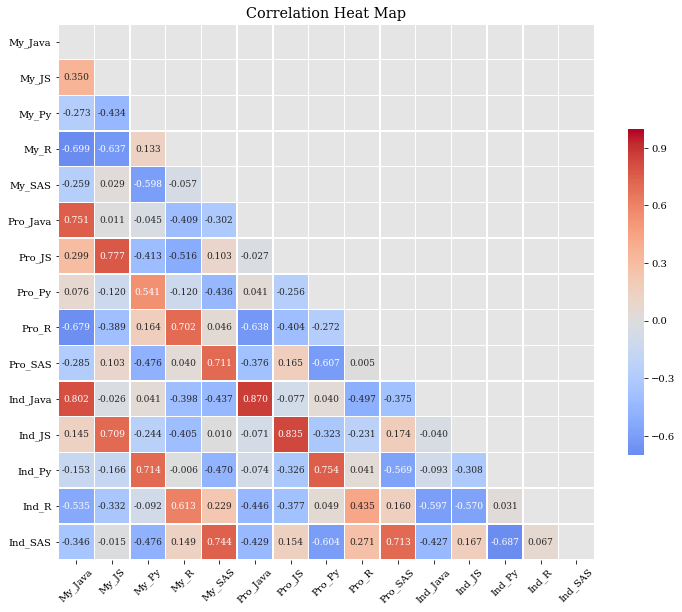


 -------- Descriptive statistics for course interest - future students --------


,py_int,de_int,app_int,sys_int
count,33.000000,32.000000,33.000000,32.000000
mean,81.121212,65.593750,61.939394,61.875000
std,22.444038,30.245084,34.385625,35.401613
min,30.000000,0.000000,0.000000,0.000000
25%,65.000000,38.750000,35.000000,28.750000
50%,90.000000,72.500000,72.000000,70.500000
75%,100.000000,96.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000



--------- Median for course interest - future students ------


py_int     90.0
de_int     72.5
app_int    72.0
sys_int    70.5
dtype: float64

<Figure size 1080x360 with 0 Axes>

Text(0.5,1,'Boxplot of Course Interest - Future Students')

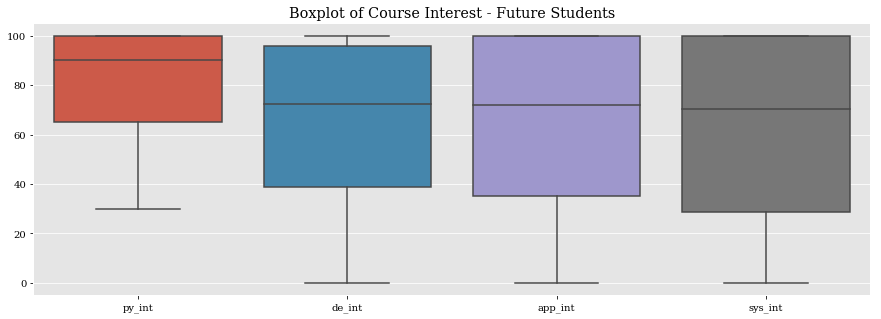


--------- course interest correlations - future students ------


<Figure size 720x576 with 0 Axes>

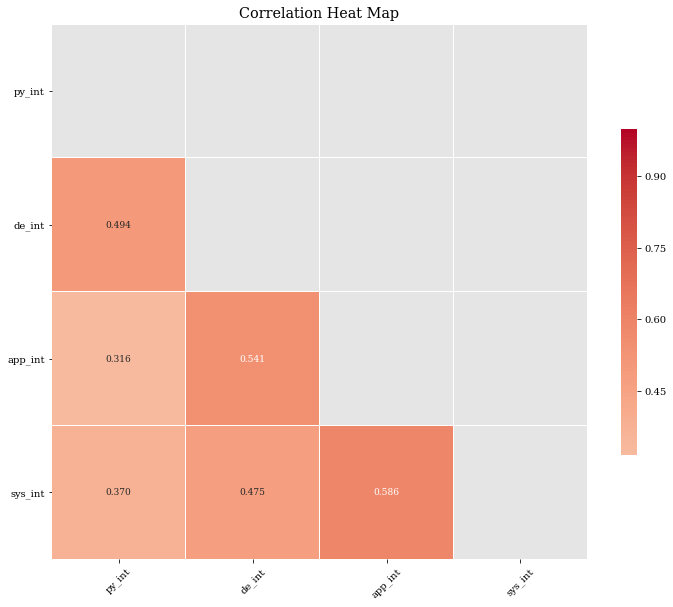

In [14]:
# Explore Future Students (Grad Date 2019 or Later)
# descriptive statistics for one variable
print('\n------- Descriptive statistics for courses completed --------')
future_survey_df['n_courses'].describe()

# descriptive statistics for software preference variables
print('\n-------- Descriptive statistics for software preferences -------')
future_software_df.describe()

# examine intercorrelations among software preference variables
# with correlation matrix/heat map
print('\n------- Correlation Matrix - Software Prefs - Future Students -------')
corr_chart(df_corr = future_software_df) 

###
print('\n -------- Descriptive statistics for course interest - future students --------')
future_course_int_df.describe()
print('\n--------- Median for course interest - future students ------')
future_course_int_df.median()
plt.figure(figsize = (15,5))
sns.boxplot(data=future_course_int_df)
plt.title("Boxplot of Course Interest - Future Students")
plt.show()
plt.close()

###
print('\n--------- course interest correlations - future students ------')
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = future_course_int_df) 

---

#### transformations a la Scikit Learn
transformations a la Scikit Learn
documentation at http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

<Figure size 1080x360 with 0 Axes>

Text(0.5,1,'Boxplot of Software Preference - All Students')

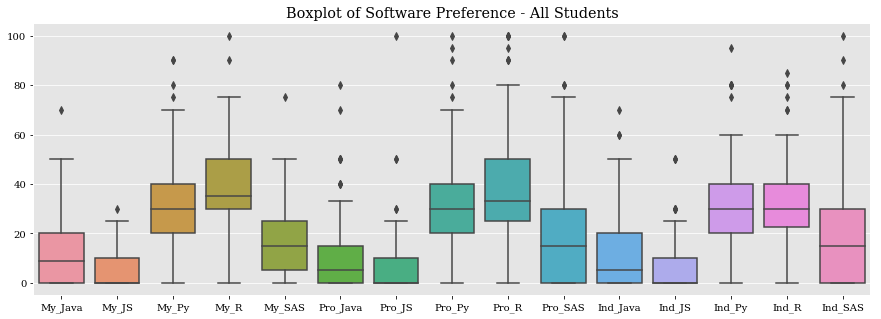

In [15]:
#Box and whisker plot
plt.figure(figsize = (15,5))
sns.boxplot(data=software_df)
plt.title("Boxplot of Software Preference - All Students")
plt.show()
plt.close()

Text(0.5,1,'Unscaled')

Text(0.5,1,'Transformation-Unscaled')

Text(0.5,1,'StandardScaler')

Text(0.5,1,'Transformation-StandardScaler')

Text(0.5,1,'MinMaxScaler')

Text(0.5,1,'Transformation-MinMaxScaler')

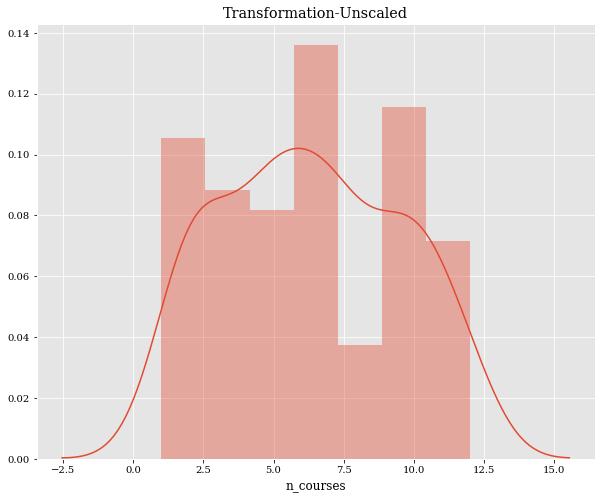

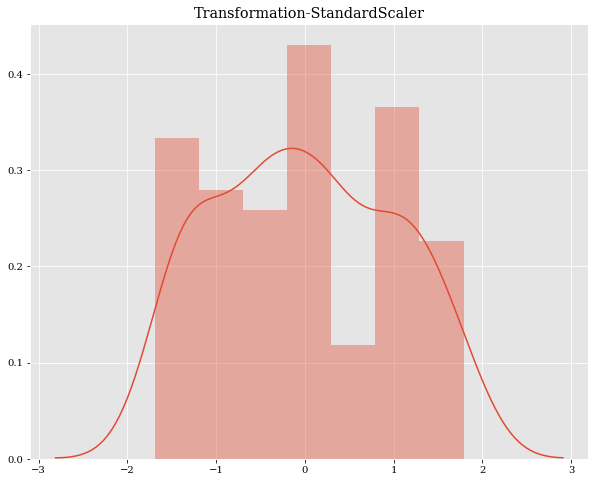

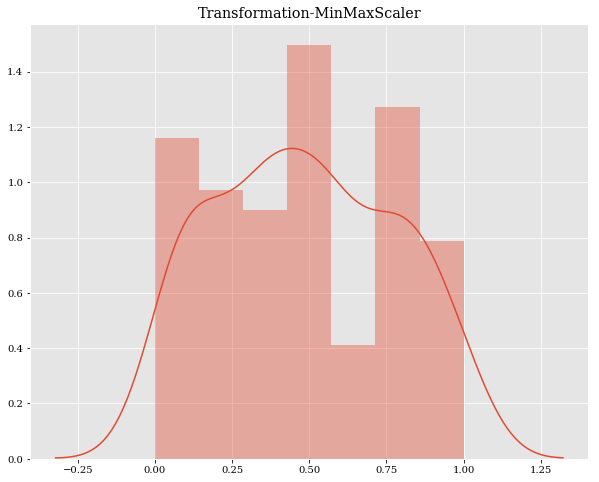

In [16]:
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['n_courses'].dropna()

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
plt.title("Transformation-Unscaled")

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X.values.reshape(-1, 1))).set_title('StandardScaler')
plt.title("Transformation-StandardScaler")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('MinMaxScaler')
plt.title("Transformation-MinMaxScaler")

plt.show()
plt.close()

<Figure size 720x576 with 0 Axes>

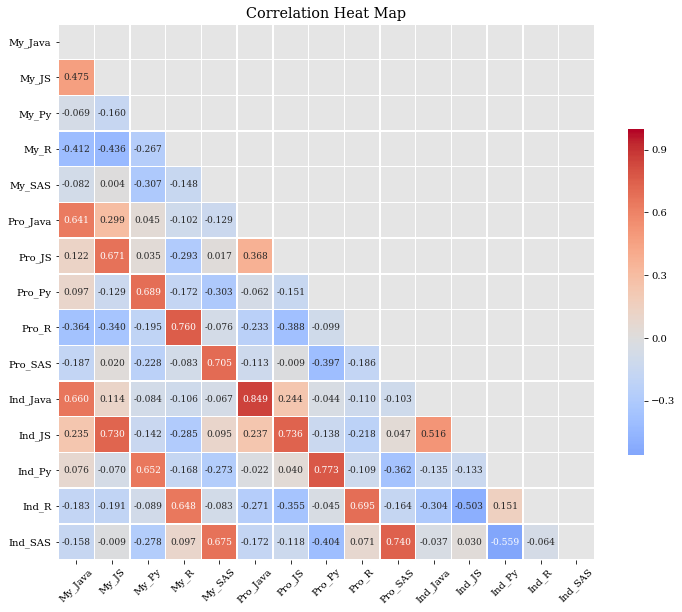

In [17]:
#logged version of correlation heat map
software_df_log = np.log(software_df)
corr_chart(df_corr = software_df_log) 
plt.show()
plt.close()

Text(0.5,1,'Unscaled')

Text(0.5,1,'Transformation-Unscaled')

Text(0.5,1,'StandardScaler')

Text(0.5,1,'Transformation-StandardScaler')

Text(0.5,1,'MinMaxScaler')

Text(0.5,1,'Transformation-MinMaxScaler')

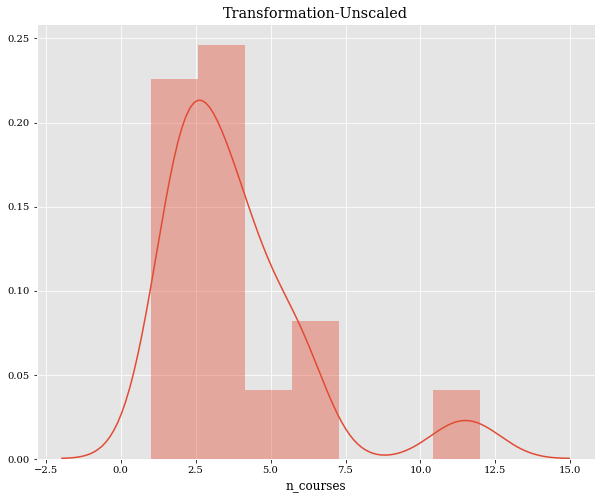

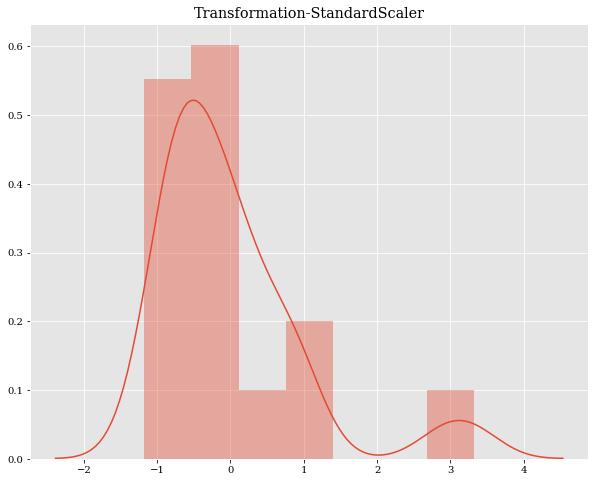

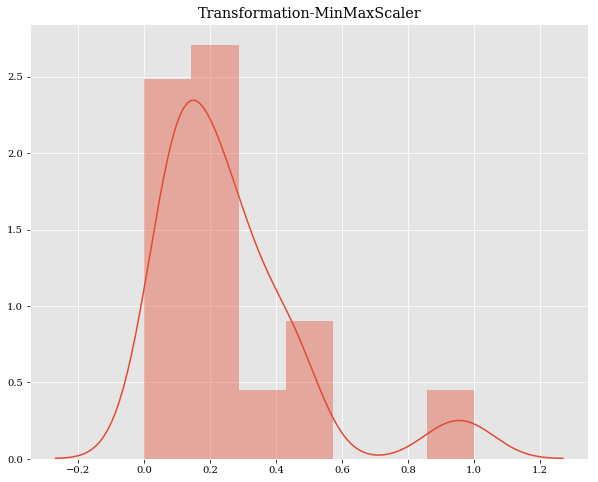

In [18]:
# select variable to examine, eliminating missing data codes
X = future_survey_df['n_courses'].dropna()

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
plt.title("Transformation-Unscaled")

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X.values.reshape(-1, 1))).set_title('StandardScaler')
plt.title("Transformation-StandardScaler")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('MinMaxScaler')
plt.title("Transformation-MinMaxScaler")

plt.show()
plt.close()

<Figure size 1080x360 with 0 Axes>

Text(0.5,1,'Boxplot of Software Preference - Future Students')

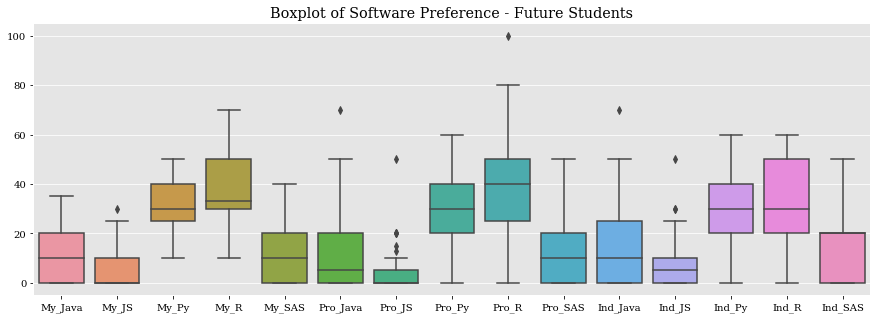

In [19]:
###
#Box and whisker plot
plt.figure(figsize = (15,5))
sns.boxplot(data=future_software_df)
plt.title("Boxplot of Software Preference - Future Students")
plt.show()
plt.close()

<Figure size 720x576 with 0 Axes>

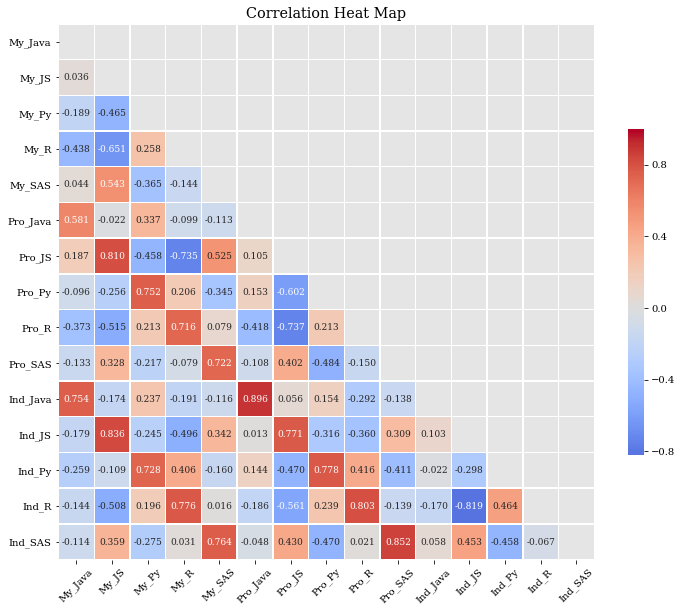

In [20]:
#logged version of correlation heat map
future_software_df_log = np.log(future_software_df)
corr_chart(df_corr = future_software_df_log) 
plt.show()
plt.close()


Skewness of Courses_Completed ---------------
My_Java     1.414207
My_JS       1.370855
My_Py       0.645362
My_R        0.889625
My_SAS      0.856755
Pro_Java    2.134142
Pro_JS      4.237617
Pro_Py      0.618311
Pro_R       0.812853
Pro_SAS     1.393209
Ind_Java    1.412605
Ind_JS      1.754266
Ind_Py      0.595932
Ind_R       0.338222
Ind_SAS     1.322292
dtype: float64

Kurtosis of Courses_Completed ---------------
My_Java      3.212303
My_JS        1.145935
My_Py        1.831434
My_R         1.848680
My_SAS       1.081327
Pro_Java     6.192692
Pro_JS      29.216056
Pro_Py       0.960039
Pro_R        1.219957
Pro_SAS      2.945046
Ind_Java     1.723799
Ind_JS       3.581796
Ind_Py       0.991027
Ind_R        0.708630
Ind_SAS      2.046902
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1A34E0908>,
      dtype=object)

Text(0.5,1,'Courses_Completed')

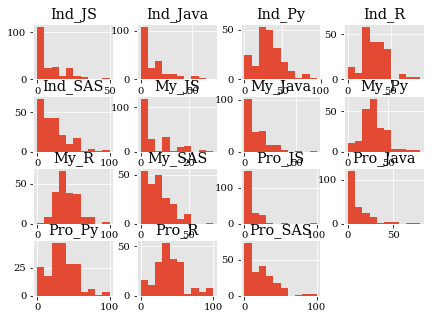

In [21]:
# Check the skewness/kurtosis of Courses_Completed 
print('\nSkewness of Courses_Completed ---------------')
print(software_df.skew())

print('\nKurtosis of Courses_Completed ---------------')
print(software_df.kurtosis())

# Check distribution of  Courses_Completed  by histogram
software_df.hist(figsize=(7,5))
plt.title('Courses_Completed')
plt.show()
plt.close()

<Figure size 1080x360 with 0 Axes>

Text(0.5,1,'Future Students - 2019 or later')

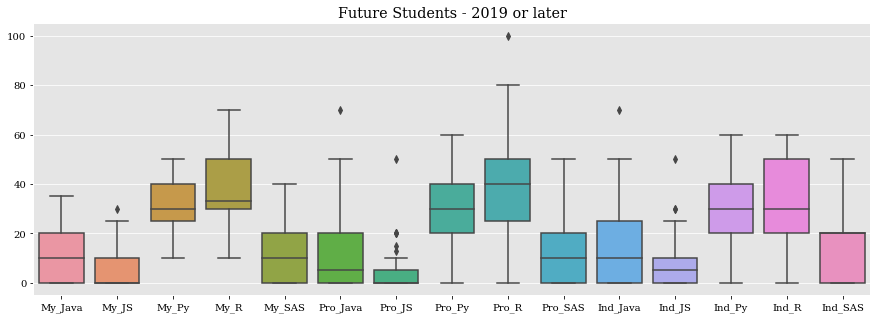

In [22]:
future = ['Winter 2019','Spring 2019','Summer 2019','Fall 2019', '2020 or Later']
future_students = survey_df[survey_df.Graduate_Date.isin(future)  ]

software_future = future_students.loc[:,'My_Java':'Ind_SAS']

#Box and whisker plot
plt.figure(figsize = (15,5))
sns.boxplot(data=software_future)
plt.title("Future Students - 2019 or later")
plt.show()
plt.close()

In [23]:
grad_date = future_students.loc[:,"Graduate_Date"]
print(grad_date.value_counts())
print(sum(grad_date.value_counts()))

Winter 2019      11
Spring 2019       9
2020 or Later     5
Fall 2019         5
Summer 2019       3
Name: Graduate_Date, dtype: int64
33


In [24]:
# get totals for prof_python, prof_r, and prof_sas software preferences
ind_python_preferencel_f = future_software_df['Ind_Py'].sum()
ind_r_preferencel_f = future_software_df['Ind_R'].sum()
ind_sas_preferencel_f = future_software_df['Ind_SAS'].sum()

ind_software_pereference_total_f = ind_python_preferencel_f + ind_r_preferencel_f + ind_sas_preferencel_f  

ind_python_preferencel_f_perc = 100*ind_python_preferencel_f / ind_software_pereference_total_f
ind_r_preferencel_f_perc = 100*ind_r_preferencel_f / ind_software_pereference_total_f
ind_sas_preferencel_f_perc = 100*ind_sas_preferencel_f / ind_software_pereference_total_f

print("\nPython Industry Preference Percent --------\n{:.{prec}f} %".format(ind_python_preferencel_f_perc, prec=2))
print("\nR Industry Preference Percent -------------\n{:.{prec}f} %".format(ind_r_preferencel_f_perc, prec=2))
print("\nSAS Industry Preference Percent -----------\n{:.{prec}f} %".format(ind_sas_preferencel_f_perc, prec=2))


Python Industry Preference Percent --------
37.61 %

R Industry Preference Percent -------------
41.77 %

SAS Industry Preference Percent -----------
20.61 %


In [25]:
survey_df.columns

Index(['My_Java', 'My_JS', 'My_Py', 'My_R', 'My_SAS', 'Pro_Java', 'Pro_JS', 'Pro_Py', 'Pro_R', 'Pro_SAS', 'Ind_Java', 'Ind_JS', 'Ind_Py', 'Ind_R', 'Ind_SAS', 'py_int', 'de_int', 'app_int', 'sys_int', 'n_courses', 'PREDICT400', 'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT420', 'Graduate_Date', 'Q_Left', 'Student_Type'], dtype='object')

Text(0.5,1,'Unscaled')

Text(0.5,1,'Transformation-Unscaled')

Text(0.5,1,'StandardScaler')

Text(0.5,1,'Transformation-StandardScaler')

Text(0.5,1,'MinMaxScaler')

Text(0.5,1,'Transformation-MinMaxScaler')

Text(0.5,1,'Normalizer')

Text(0.5,1,'Transformation-Normalizer')

Text(0.5,1,'MaxAbsScaler')

Text(0.5,1,'Transformation-MaxAbsScaler')

Text(0.5,1,'RobustScaler')

Text(0.5,1,'Transformation-RobustScaler')

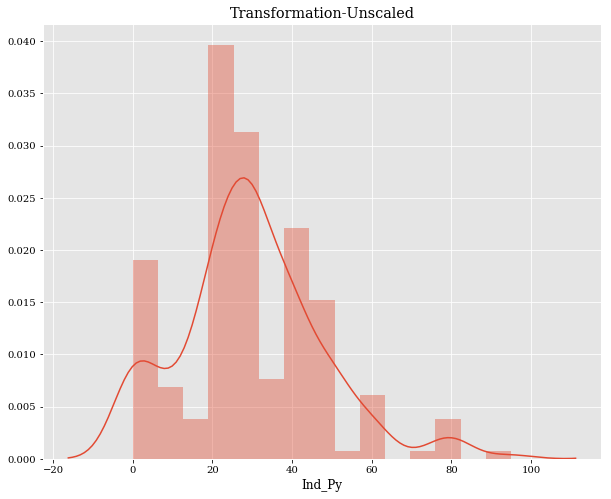

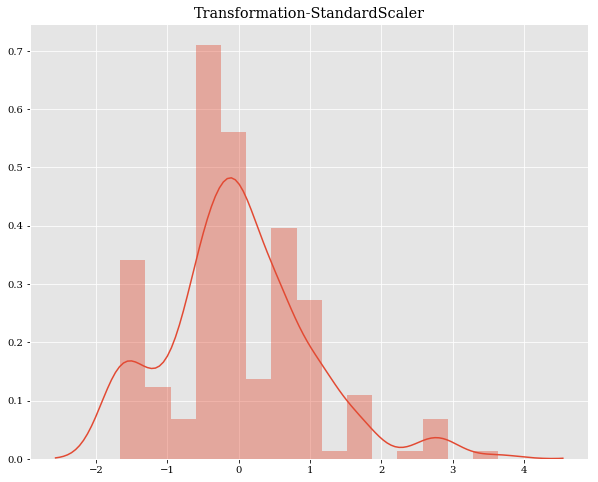

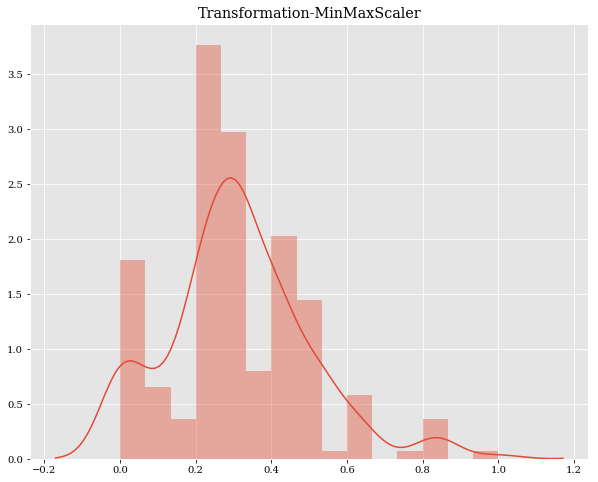

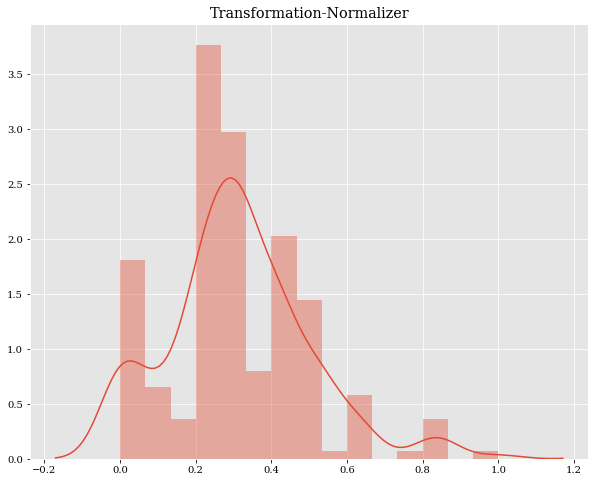

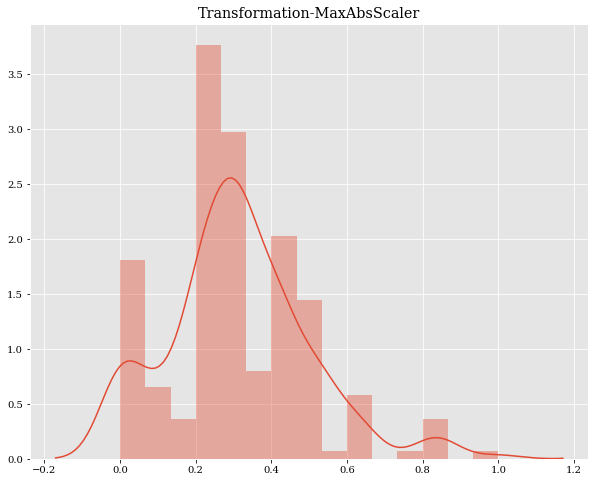

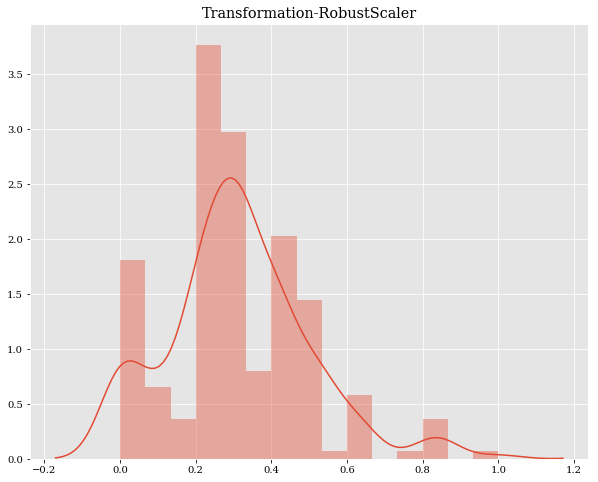

In [26]:
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Ind_Py'].dropna()

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
plt.title("Transformation-Unscaled")

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X.values.reshape(-1, 1))).set_title('StandardScaler')
plt.title("Transformation-StandardScaler")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('MinMaxScaler')
plt.title("Transformation-MinMaxScaler")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('Normalizer')
plt.title("Transformation-Normalizer")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('MaxAbsScaler')
plt.title("Transformation-MaxAbsScaler")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('RobustScaler')
plt.title("Transformation-RobustScaler")

plt.show()
plt.close()

Text(0.5,1,'Unscaled')

Text(0.5,1,'Transformation-Unscaled')

Text(0.5,1,'StandardScaler')

Text(0.5,1,'Transformation-StandardScaler')

Text(0.5,1,'MinMaxScaler')

Text(0.5,1,'Transformation-MinMaxScaler')

Text(0.5,1,'Normalizer')

Text(0.5,1,'Transformation-Normalizer')

Text(0.5,1,'MaxAbsScaler')

Text(0.5,1,'Transformation-MaxAbsScaler')

Text(0.5,1,'RobustScaler')

Text(0.5,1,'Transformation-RobustScaler')

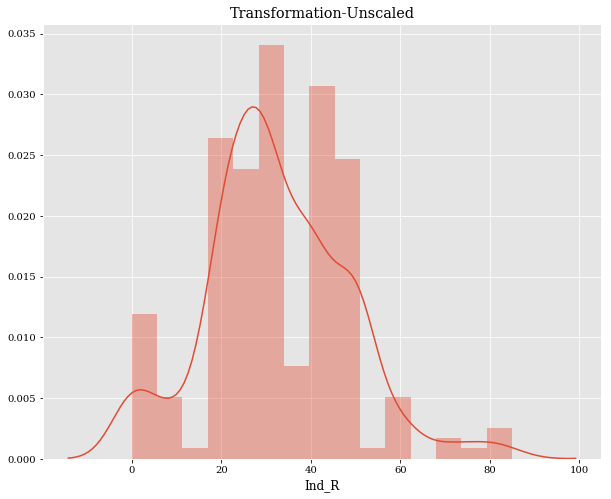

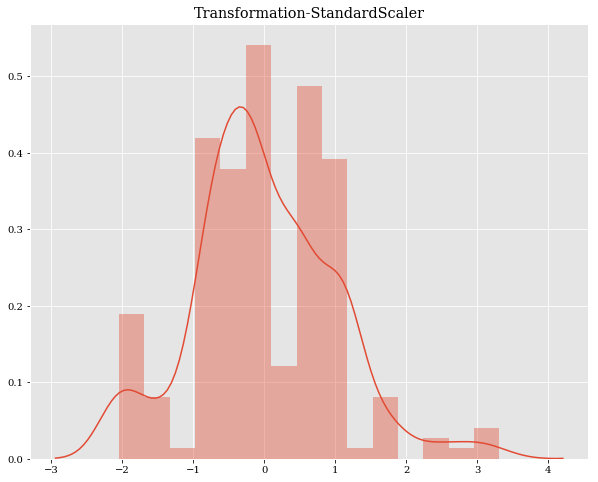

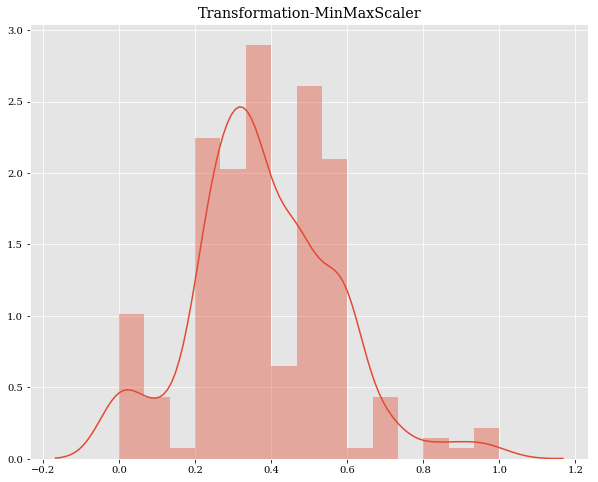

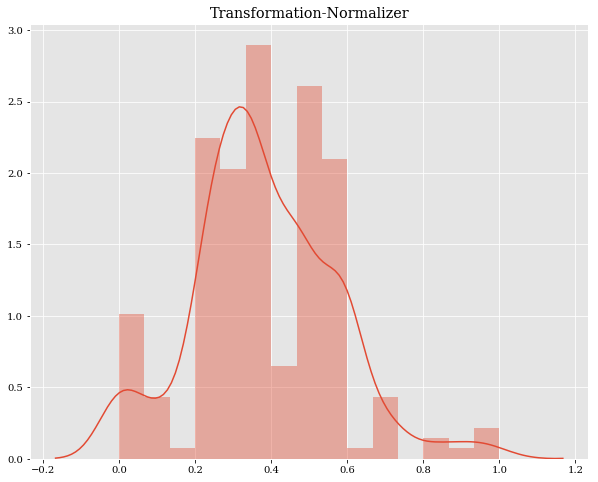

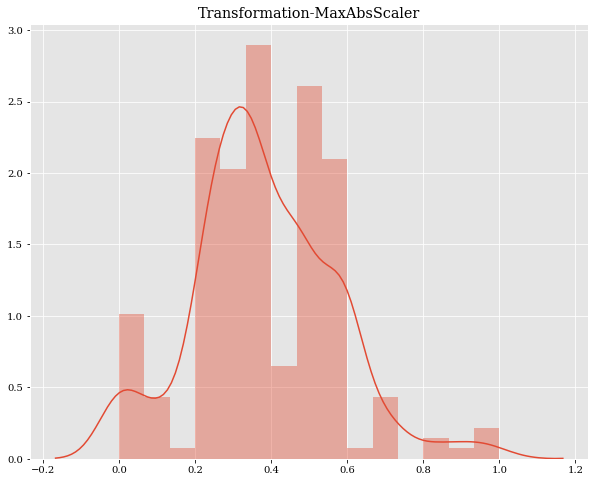

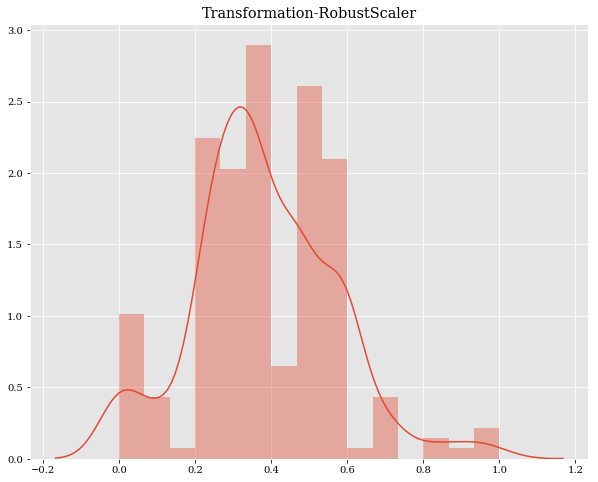

In [27]:
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Ind_R'].dropna()

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
plt.title("Transformation-Unscaled")

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X.values.reshape(-1, 1))).set_title('StandardScaler')
plt.title("Transformation-StandardScaler")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('MinMaxScaler')
plt.title("Transformation-MinMaxScaler")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('Normalizer')
plt.title("Transformation-Normalizer")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('MaxAbsScaler')
plt.title("Transformation-MaxAbsScaler")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('RobustScaler')
plt.title("Transformation-RobustScaler")

plt.show()
plt.close()

Text(0.5,1,'Unscaled')

Text(0.5,1,'Transformation-Unscaled')

Text(0.5,1,'StandardScaler')

Text(0.5,1,'Transformation-StandardScaler')

Text(0.5,1,'MinMaxScaler')

Text(0.5,1,'Transformation-MinMaxScaler')

Text(0.5,1,'Normalizer')

Text(0.5,1,'Transformation-Normalizer')

Text(0.5,1,'MaxAbsScaler')

Text(0.5,1,'Transformation-MaxAbsScaler')

Text(0.5,1,'RobustScaler')

Text(0.5,1,'Transformation-RobustScaler')

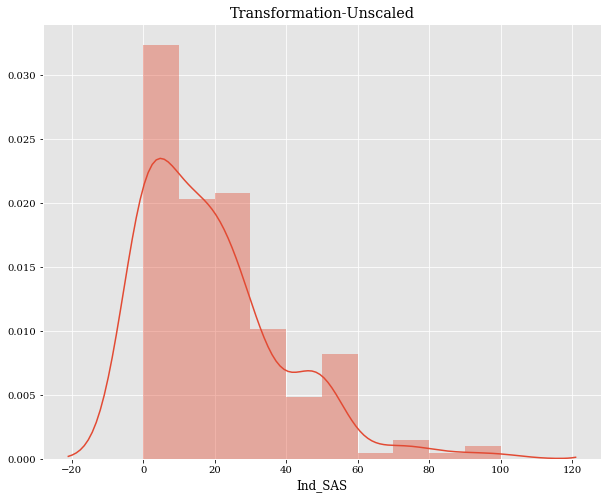

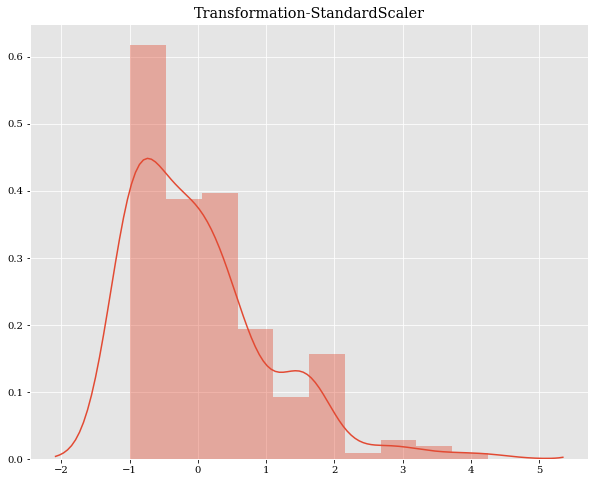

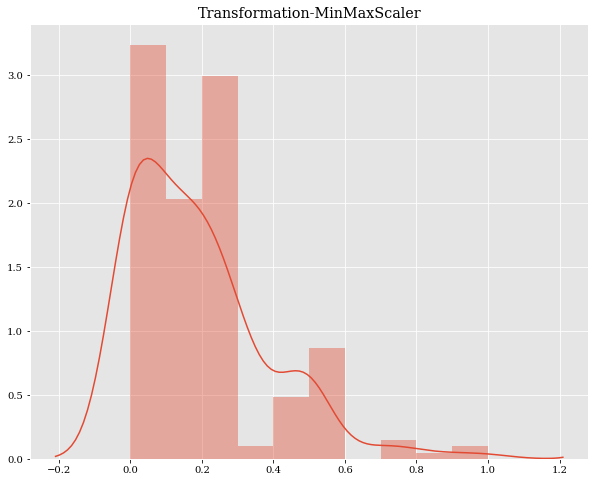

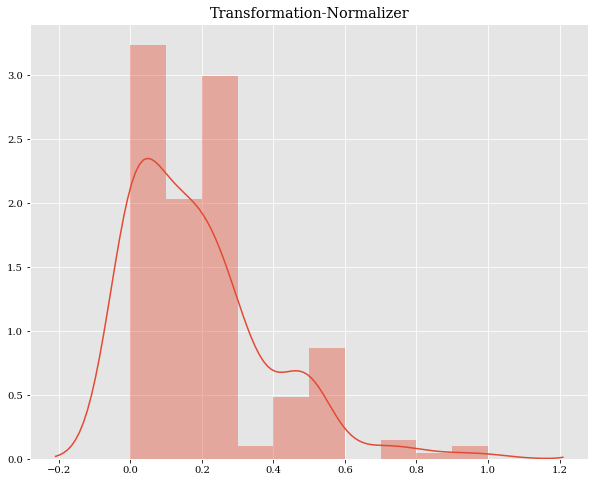

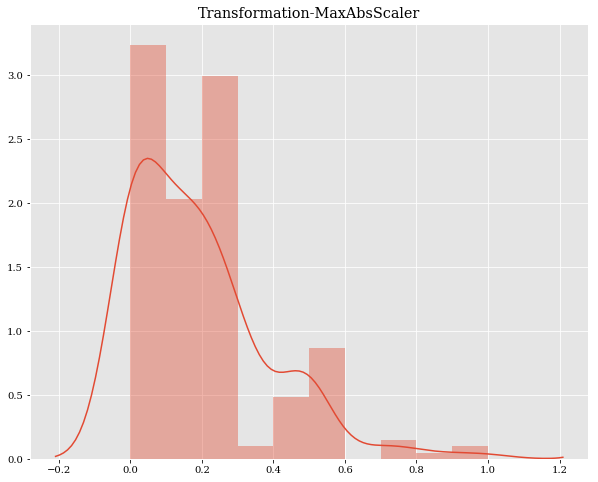

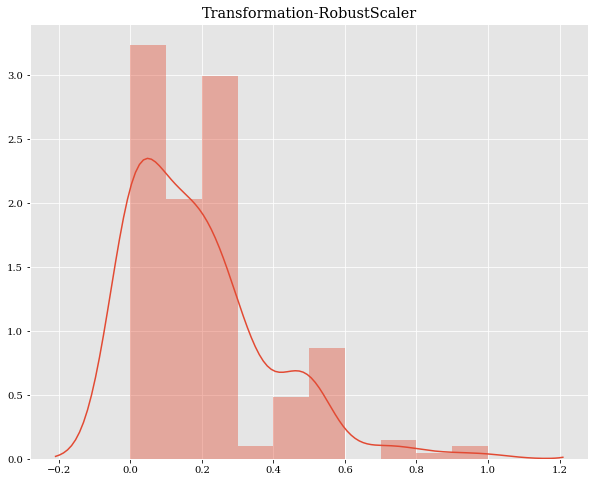

In [28]:
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Ind_SAS'].dropna()

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
plt.title("Transformation-Unscaled")

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X.values.reshape(-1, 1))).set_title('StandardScaler')
plt.title("Transformation-StandardScaler")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('MinMaxScaler')
plt.title("Transformation-MinMaxScaler")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('Normalizer')
plt.title("Transformation-Normalizer")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('MaxAbsScaler')
plt.title("Transformation-MaxAbsScaler")

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1, 1))).set_title('RobustScaler')
plt.title("Transformation-RobustScaler")

plt.show()
plt.close()

#### REPORT/FINDINGS:

(1) A summary and problem definition for management

Data science is a fast-changing field, and administrators for Data Science degree programs have a difficult task of planning and changing curriculum offerings to keep up with industry trends. Curriculum planning decisions are essential to attracting more students to the program, and to ensure satisfaction of enrolled students. The MSPA Survey was designed and administered with the following objectives in mind: 1) Learn about current student software preferences; 2) learn about student interest in potential new courses; 3) guide software and systems planning for current and future courses; and 4) guide data science curriculum planning. The results of the survey will be shared with management, along with curiculum planning recommendations. 

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

The MSPA Software Survey was collected in December 2016. The survey was conducted online using Survey Monkey. A comma-delimited text file was exported from Survey Monkey, and analyzed in jupyter notebook using various python libraries. Initial data exploration was conducted, including computing descriptive statistics and producing data visualizations. The traditional methods used were histograms, scatterplots, correlation matrices, and boxplots. The machine learning methods employed were variable transformation and scaling methods. Best practices indicate that it is often best to use scaling methods that preserve the shape of the distribution, but using the log or normalizing transformations may be needed if the data contains extreme outliers or heavily skewed distributions. 

(3) Overview of programming work

Once the original dataset was read into the jupyter notebook, the RespondentID was moved to the dataframe index. The shape of the data was reviewed, and variables with 30% or more missing values were removed from the dataframe. The long variable names were renamed to shorter names for ease of programming and visualizations. The data was further subset to different groups, resulting in the following dataframes; 1) all data, from all students; 2) all data, only from future students; 3) only software preferences variables, from all students; 4) only new course interest variables from all students; 5) only software preferences variables, from future students; 6) only new course interest variables, from future students. 

Data distributions for numerical variables showed some variables, such as all three versions (personal, professional, or industry interest) of JS, Java, and even SAS variables were skewed. Descriptive statistics were computed for number of courses completed, software preference, and course interest, for both "all student subset" and "future student" subset. Scatterplots and correlation matrices were run to look for correlated variables. Boxplots were run to look at the spread of data and any outliers. The skewness and kurtosis functions showed some skewness and outliers were visible in the boxplot. Variable transformation and scaling methods were explored (StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler, RobustScaler) for a few variables, including courses completed.   

(4) Review of results with recommendations for management.

The correlation heat map for programming preferences showed a heavy correlation for the same language for personal and professional/industry interest. For example, personal interest in python and industry interest in python have a positive correlation of 0.780; personal interest in python and professional interest in python have a positive correlation of 0.731. A positive correlation can also be seen in the scatterplot matrices for each language.  

Median values for course interest were 82.5 for the python course, 60 for both data engineering and analytics app development, and 51.5 for systems analysis. However, when we subsetted the data to only include future students, (defined as those graduating in 2019 or later), these numbers jumped to 90 for the python course, 72.5 for data engineering, 72 for analytics app development, and 70.5 for systems analysis. Any changes in the curriculum will most affect future students, so based on these results, there is enough interest that the program should introduce all 4 of these courses into the new curriculum. 

For industry preference of future students, 37.61% preferred python, 41.77% preferred R, and only 20.61% preferred SAS. The program administrators are interested in keeping the program relevant in terms of industry trends, and based on this survey, it seems like a good move to upgrade current SAS  courses to python. 
